In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:
import os
from pathlib import Path

import networkx as nx
import pandas as pd
import numpy as np

import country_converter as coco

import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
year='2015'

ROW not found in ISO3


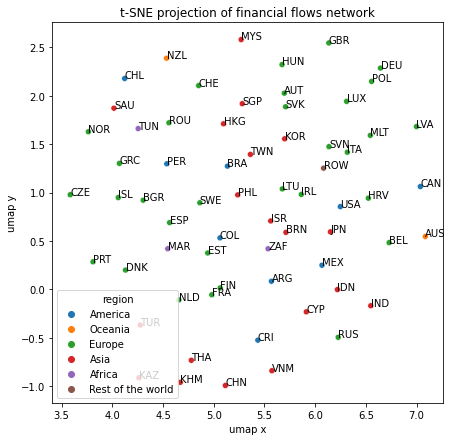

In [4]:
def plot_umap(graph):

    g = nx.linalg.graphmatrix.adjacency_matrix(graph).toarray()

    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(g)

    names = list(G.nodes)
    regions = {c:coco.convert(c, to='Continent') for c in names}
    regions['ROW'] = 'Rest of the world'
    
    df_plot = pd.DataFrame({'umap x':embedding[:, 0], 'umap y':embedding[:, 1], 'country':names, })
    df_plot['region'] = df_plot.country.map(regions)
    
    fig, ax = plt.subplots(figsize=(7,7))

    sns.scatterplot(data=df_plot, x='umap x', y='umap y', hue = 'region', ax=ax)
    
    for i, txt in enumerate(names):
        ax.annotate(txt, (embedding[:, 0][i], embedding[:, 1][i]))

    
    
network_path = os.path.join(output_filepath, year, 'A_country.graphml')
G = nx.readwrite.graphml.read_graphml(network_path)

plot_umap(G)
plt.title('t-SNE projection of financial flows network')
plt.show()

ROW not found in ISO3


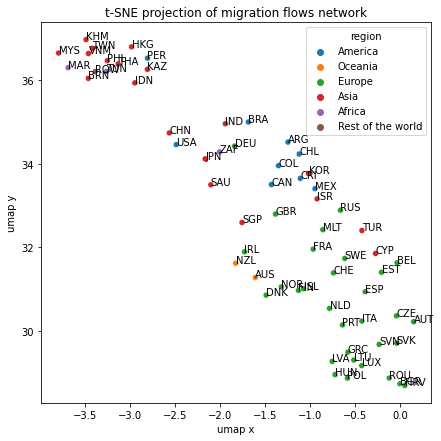

In [5]:
network_path = os.path.join(output_filepath, year, 'migration_network.graphml')
G = nx.readwrite.graphml.read_graphml(network_path)
plot_umap(G)
plt.title('t-SNE projection of migration flows network')

save_to = os.path.join(Path(output_filepath).parent.parent.resolve(), 'reports', 'figures', 'tsne_migration_network.png')
plt.savefig(save_to)    
plt.show()

ROW not found in ISO3


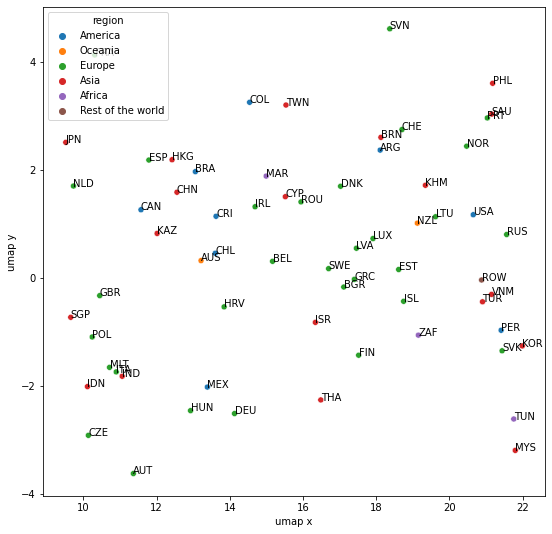

In [6]:
network_path = os.path.join(output_filepath, year, 'migration_network.graphml')
G = nx.readwrite.graphml.read_graphml(network_path)
g = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()

reducer = umap.UMAP(n_components=1)
embedding_1 = reducer.fit_transform(g)

network_path = os.path.join(output_filepath, year, 'A_country.graphml')
G = nx.readwrite.graphml.read_graphml(network_path)
g = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()

reducer = umap.UMAP(n_components=1)
embedding_2 = reducer.fit_transform(g)

names = list(G.nodes)
regions = {c:coco.convert(c, to='Continent') for c in names}
regions['ROW'] = 'Rest of the world'


df_plot = pd.DataFrame({'umap x':embedding_1[:,0], 'umap y':embedding_2[:,0], 'country':names})
df_plot['region'] = df_plot.country.map(regions)

fig, ax = plt.subplots(figsize=(9,9))
sns.scatterplot(data=df_plot, x='umap x', y='umap y', hue = 'region', ax=ax)

for i, txt in enumerate(names):
    ax.annotate(txt, (embedding_1[:, 0][i], embedding_2[:, 0][i]))

plt.show()
